## Observations and Insights 

In [ ]:
1. The first observation I got from the data was that Mouse g989 had 5 Timepoints repeated, so, that mouse
had to be dropped from the data.
2. The second observation I noticed was in the Summary Stats for each drug Regimen for the Tumor Volume, 
was that Ramicane and Capomulin were the best against the tumors because their mean size was around 40mm3 
versus the others which are between 51mm3 to 55mm3.
3. The third observation is that the heavier the mouse, the less effective is the drug Capomulin because 
the Tumor volume also increases. (see Scatter plot and correlation coefficient)

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata_df, study_results_df, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data
# combined_data.count()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
mice_number = combined_data["Mouse ID"].unique()
len(mice_number)

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Check the to see if any mice are listed more than 10 times
combined_data['Mouse ID'].value_counts().head()

g989    13
a818    10
i901    10
z795    10
l471    10
Name: Mouse ID, dtype: int64

In [16]:
# Check Mouse ID = g989 to see where is listed twice
combined_data_mice = combined_data.set_index('Mouse ID')
mouse = combined_data_mice.loc['g989', :]
mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [22]:
# Drop any duplicate rows
# Delete the data for Mouse ID = g989
clean_data_mice = combined_data_mice.drop(index = 'g989')
clean_data = clean_data_mice.reset_index()
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Recheck the number of mice
mice_number2 = clean_data["Mouse ID"].unique()
len(mice_number2)

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summary_stats = clean_data.groupby("Drug Regimen")

mean = summary_stats["Tumor Volume (mm3)"].mean()
median = summary_stats["Tumor Volume (mm3)"].median()
variance = summary_stats["Tumor Volume (mm3)"].var()
std_dev = summary_stats["Tumor Volume (mm3)"].std()
sem = summary_stats["Tumor Volume (mm3)"].sem()

# Create a dataframe for Summary statistics 
summary_stats_group = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": std_dev,
                              "SEM": sem})

summary_stats_group

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

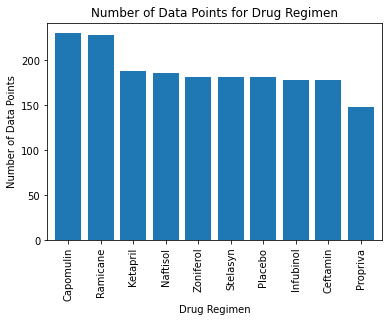

In [129]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
bar_plot_pandas = clean_data['Drug Regimen'].value_counts().plot(kind="bar", figsize=(6,4), width = 0.8)

# Set labels for axes
bar_plot_pandas.set_xlabel("Drug Regimen")
bar_plot_pandas.set_ylabel("Number of Data Points")
bar_plot_pandas.set_title("Number of Data Points for Drug Regimen")
# There should be a single bar per regimen
plt.show()

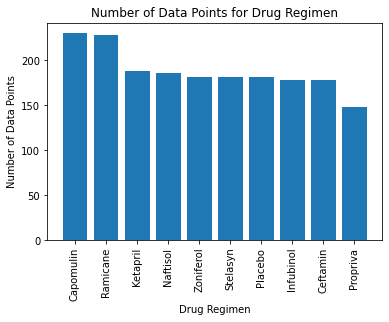

In [128]:
# Generate identical bar plot using pyplot instead of pandas.
drugs = clean_data['Drug Regimen'].value_counts()
x_axis = np.arange(len(drugs))
plt.bar(x_axis, drugs, alpha=1, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs.index.values)

# Rotate the xticks to be vertical
plt.xticks(rotation = 90)

# Give our chart some labels and a title
plt.title("Number of Data Points for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

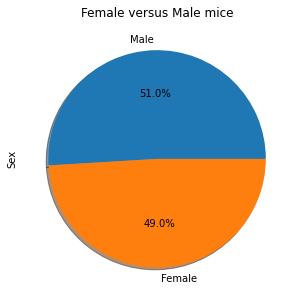

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_pandas = clean_data['Sex'].value_counts().plot(kind="pie", figsize=(5,5), autopct='%1.1f%%', shadow=True)

# Set Title label
pie_plot_pandas.set_title("Female versus Male mice")
plt.show()

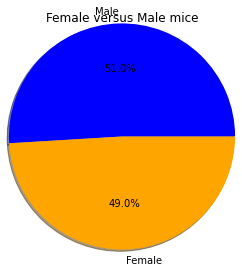

In [126]:
# Generate identical pie plot using pyplot
# Labels for the sections of our pie chart
# The values of each section of the pie chart
sex = clean_data['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sex, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, radius=1.3)

# Set Title label
plt.title("Female versus Male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max().sort_values(ascending=False)).reset_index().rename(columns={'Timepoint': 'Greatest Timepoint'})
greatest_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data, greatest_tp, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [96]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == drug]
       
    # add subset 
    last_volume = tumor_vol.loc[tumor_vol['Timepoint'] == tumor_vol['Greatest Timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    volumes = last_volume['Tumor Volume (mm3)']
    tumor_data.append(volumes)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'The interquartile range for {drug} is: {iqr}')
    
    # Determine outliers using upper and lower bounds
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug} the values below {lower_bound} could be outliers.')
    print(f'For {drug} the values below {upper_bound} could be outliers.')
    
    # How many outliers per drug
    outliers_number = (volumes.loc[(last_volume['Tumor Volume (mm3)'] >= upper_bound) | (last_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'The number of outliers for {drug} is: {outliers_number}')

The interquartile range for Capomulin is: 7.781863460000004
For Capomulin the values below 20.70456164999999 could be outliers.
For Capomulin the values below 51.83201549 could be outliers.
The number of outliers for Capomulin is: 0
The interquartile range for Ramicane is: 9.098536719999998
For Ramicane the values below 17.912664470000003 could be outliers.
For Ramicane the values below 54.30681135 could be outliers.
The number of outliers for Ramicane is: 0
The interquartile range for Infubinol is: 11.477135160000003
For Infubinol the values below 36.83290494999999 could be outliers.
For Infubinol the values below 82.74144559000001 could be outliers.
The number of outliers for Infubinol is: 1
The interquartile range for Ceftamin is: 15.577752179999997
For Ceftamin the values below 25.355449580000002 could be outliers.
For Ceftamin the values below 87.66645829999999 could be outliers.
The number of outliers for Ceftamin is: 0


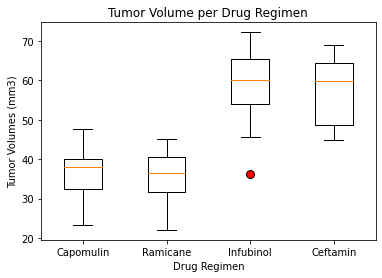

In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
# Plot the Boxplot for the tumor volumes per drug
plt.boxplot(tumor_data, flierprops=flierprops)

# Format for outliers in Boxplot
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Give our chart some labels and a title
plt.title("Tumor Volume per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volumes (mm3)")

# Set xticks for each Drug regimen
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [117]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
# Look for all mice treated with Capomulin drug
capomulin = merged_df.loc[merged_df['Drug Regimen'] == "Capomulin"]
capomulin = capomulin.reset_index()
capomulin

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,10,s185,Capomulin,Female,3,17,0,45.000000,0,45
1,11,s185,Capomulin,Female,3,17,5,43.878496,0,45
2,12,s185,Capomulin,Female,3,17,10,37.614948,0,45
3,13,s185,Capomulin,Female,3,17,15,38.177232,0,45
4,14,s185,Capomulin,Female,3,17,20,36.866876,0,45
...,...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1,45
226,1439,r157,Capomulin,Male,22,25,0,45.000000,0,15
227,1440,r157,Capomulin,Male,22,25,5,45.597064,0,15
228,1441,r157,Capomulin,Male,22,25,10,46.059608,0,15


In [119]:
# Select data from one mouse treated with Capomulin (Mouse ID = i557)
capomulin_one = merged_df.loc[merged_df['Mouse ID'] == "i557"]
capomulin_one

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
431,i557,Capomulin,Female,1,24,0,45.000000,0,45
432,i557,Capomulin,Female,1,24,5,42.261665,0,45
433,i557,Capomulin,Female,1,24,10,42.992077,0,45
434,i557,Capomulin,Female,1,24,15,43.529876,0,45
435,i557,Capomulin,Female,1,24,20,43.967895,0,45
436,i557,Capomulin,Female,1,24,25,44.596219,0,45
437,i557,Capomulin,Female,1,24,30,45.261384,0,45
438,i557,Capomulin,Female,1,24,35,45.941949,0,45
439,i557,Capomulin,Female,1,24,40,46.821070,1,45
440,i557,Capomulin,Female,1,24,45,47.685963,1,45


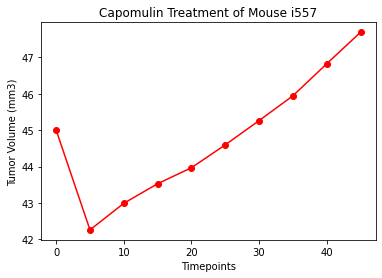

In [147]:
# Plot a line chart for Mouse i557 of Timepoint vs Tumor Volume (mm3)
plt.plot(capomulin_one["Timepoint"], capomulin_one["Tumor Volume (mm3)"], marker = 'o', color = 'r')

# Set labels for x-axis, y-axis and title
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse i557")
plt.show()

In [134]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
# Take just tumor volume vs. mouse weight of each mouse
mouse_weight = capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [138]:
# Get the average tumor volume for each mouse from Capomulin
avg_tumor_vol = pd.DataFrame(mouse_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
# Rename Tumor Volume (mm3) for Average Tumor Volume
avg_tumor_vol = avg_tumor_vol.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume"})
avg_tumor_vol.head()

,Mouse ID,Weight (g),Average Tumor Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


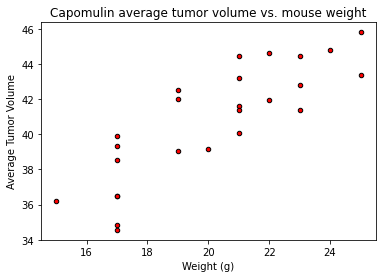

In [146]:
# Create a scatter plot of average tumor volume vs. mouse weight for Capomulin
avg_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", color="r", edgecolors="black")
# Set title and show plot
plt.title("Capomulin average tumor volume vs. mouse weight")
plt.show()

## Correlation and Regression

In [148]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Variables to calculate the correlation coefficient
weight = avg_tumor_vol.iloc[:,1]
tumor_vol = avg_tumor_vol.iloc[:,2]
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


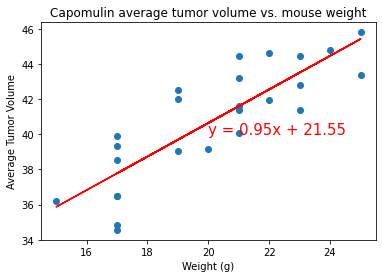

In [153]:
# Add the linear regression equation and line to plot
x_values = avg_tumor_vol["Weight (g)"]
y_values = avg_tumor_vol["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Capomulin average tumor volume vs. mouse weight")
plt.show(line_eq)